In [1]:
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import pandas as pd



In [2]:
def gather_excel_data(folder_path): # function to gather all excel files and convert to 3d numpy
    files = glob.glob(folder_path + "/*.xlsx")
    df_list = []
    for x in files:
        df = pd.read_excel(x)
        df_list.append(df)
    np_array = np.array(list(map(lambda x: x.to_numpy(), df_list)))
    np_array = np_array.reshape((len(df_list), len(df.axes[0]), len(df.axes[1]))) #(x,y,z) x is number of elements, y is rows, z is cols
    return np_array

In [3]:
class_names = ['a','b','c','d','e','f']


In [4]:
# read in data from each folder that specifies each parameter value
a = gather_excel_data("./10-02-2022.22-51-03/E=0,v=0.1,lambda=0.6") #need to adjust file path after moving
b = gather_excel_data("./10-02-2022.22-51-03/E=0,v=1,lambda=0.6")
c = gather_excel_data("./10-02-2022.22-51-03/E=0.1,v=0.1,lambda=0.6")
d = gather_excel_data("./10-02-2022.22-51-03/E=0.1,v=1,lambda=0.6")
e = gather_excel_data("./10-02-2022.22-51-03/E=0.05,v=0.1,lambda=0.6")
f = gather_excel_data("./10-02-2022.22-51-03/E=0.05,v=1,lambda=0.6")

# or 
# filepath = '#insert filepath containing all excel spreadsheets here'
# a = gather_excel_data(filepath)

# generate corresponding labels for each data set
labela = np.full(len(a),0, dtype=int)
labelb = np.full(len(b),1, dtype=int)
labelc = np.full(len(c),2, dtype=int)
labeld = np.full(len(d),3, dtype=int)
labele = np.full(len(e),4, dtype=int)
labelf = np.full(len(f),5, dtype=int)


In [5]:
# read test data and its label
a_test = gather_excel_data("./data/Cat_1")
b_test = gather_excel_data("./data/Cat_2")
c_test = gather_excel_data("./data/Cat_3")
d_test = gather_excel_data("./data/Cat_4")
e_test = gather_excel_data("./data/Cat_5")
f_test = gather_excel_data("./data/Cat_6")

test_labela = np.full(len(a_test),0, dtype=int)
test_labelb = np.full(len(b_test),1, dtype=int)
test_labelc = np.full(len(c_test),2, dtype=int)
test_labeld = np.full(len(d_test),3, dtype=int)
test_labele = np.full(len(e_test),4, dtype=int)
test_labelf = np.full(len(f_test),5, dtype=int)

In [6]:
# combine training data set into 1 big 3D array
train_data = np.concatenate((a,b,c,d,e,f), axis = 0)
train_label = np.concatenate((labela, labelb, labelc, labeld, labele, labelf), dtype = int)

# combine test data into 1 big 3D array
test_data = np.concatenate((a_test,b_test,c_test,d_test,e_test,f_test), axis = 0)
test_label = np.concatenate((test_labela, test_labelb, test_labelc, test_labeld, test_labele, test_labelf), dtype = int)

In [8]:
test_data.shape

(900, 400, 2)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(400,2)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(6)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(test_data, test_label, epochs=300)

Epoch 1/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2611 - accuracy: 0.4711
Epoch 2/300
29/29 [==============================] - 0s 2ms/step - loss: 1.2642 - accuracy: 0.4178
Epoch 3/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2579 - accuracy: 0.4333
Epoch 4/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2652 - accuracy: 0.4100
Epoch 5/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2264 - accuracy: 0.4522
Epoch 6/300
29/29 [==============================] - 0s 2ms/step - loss: 1.2342 - accuracy: 0.4867
Epoch 7/300
29/29 [==============================] - 0s 2ms/step - loss: 1.2235 - accuracy: 0.4789
Epoch 8/300
29/29 [==============================] - 0s 2ms/step - loss: 1.2383 - accuracy: 0.4744
Epoch 9/300
29/29 [==============================] - 0s 2ms/step - loss: 1.2309 - accuracy: 0.4211
Epoch 10/300
29/29 [==============================] - 0s 2ms/step - loss: 1.2251 - accuracy: 0.4189
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.9264 - accuracy: 0.5522
Epoch 84/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9239 - accuracy: 0.5867
Epoch 85/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9192 - accuracy: 0.5544
Epoch 86/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0079 - accuracy: 0.5189
Epoch 87/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9222 - accuracy: 0.5522
Epoch 88/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9034 - accuracy: 0.5944
Epoch 89/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9253 - accuracy: 0.5556
Epoch 90/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9189 - accuracy: 0.5522
Epoch 91/300
29/29 [==============================] - 0s 2ms/step - loss: 0.8956 - accuracy: 0.5922
Epoch 92/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0571 - accuracy: 0.4756
Epoch 93/300


29/29 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.8211
Epoch 246/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7744
Epoch 247/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.8000
Epoch 248/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7789
Epoch 249/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7200
Epoch 250/300
29/29 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8689
Epoch 251/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7533
Epoch 252/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7500
Epoch 253/300
29/29 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6533
Epoch 254/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7611
Epoc

In [14]:
test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2) #verbose is method of acknowledging program is running
print('\nTest accuracy:', test_acc)

29/29 - 0s - loss: 0.5429 - accuracy: 0.6689 - 170ms/epoch - 6ms/step

Test accuracy: 0.6688888669013977


In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])  # softmax layer converts to probability distribution

In [16]:
predictions = probability_model.predict(test_data)

29/29 [==============================] - 0s 714us/step


In [17]:
predictions[0]

array([0.711177  , 0.00127599, 0.09848938, 0.00154645, 0.18654735,
       0.00096382], dtype=float32)

In [18]:
def plot_image(i, predictions_array, true_label, data):
    true_label, data = true_label[i], data[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.plot(data[:,0],data[:,1])

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(6))
    plt.yticks([])
    thisplot = plt.bar(range(6), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

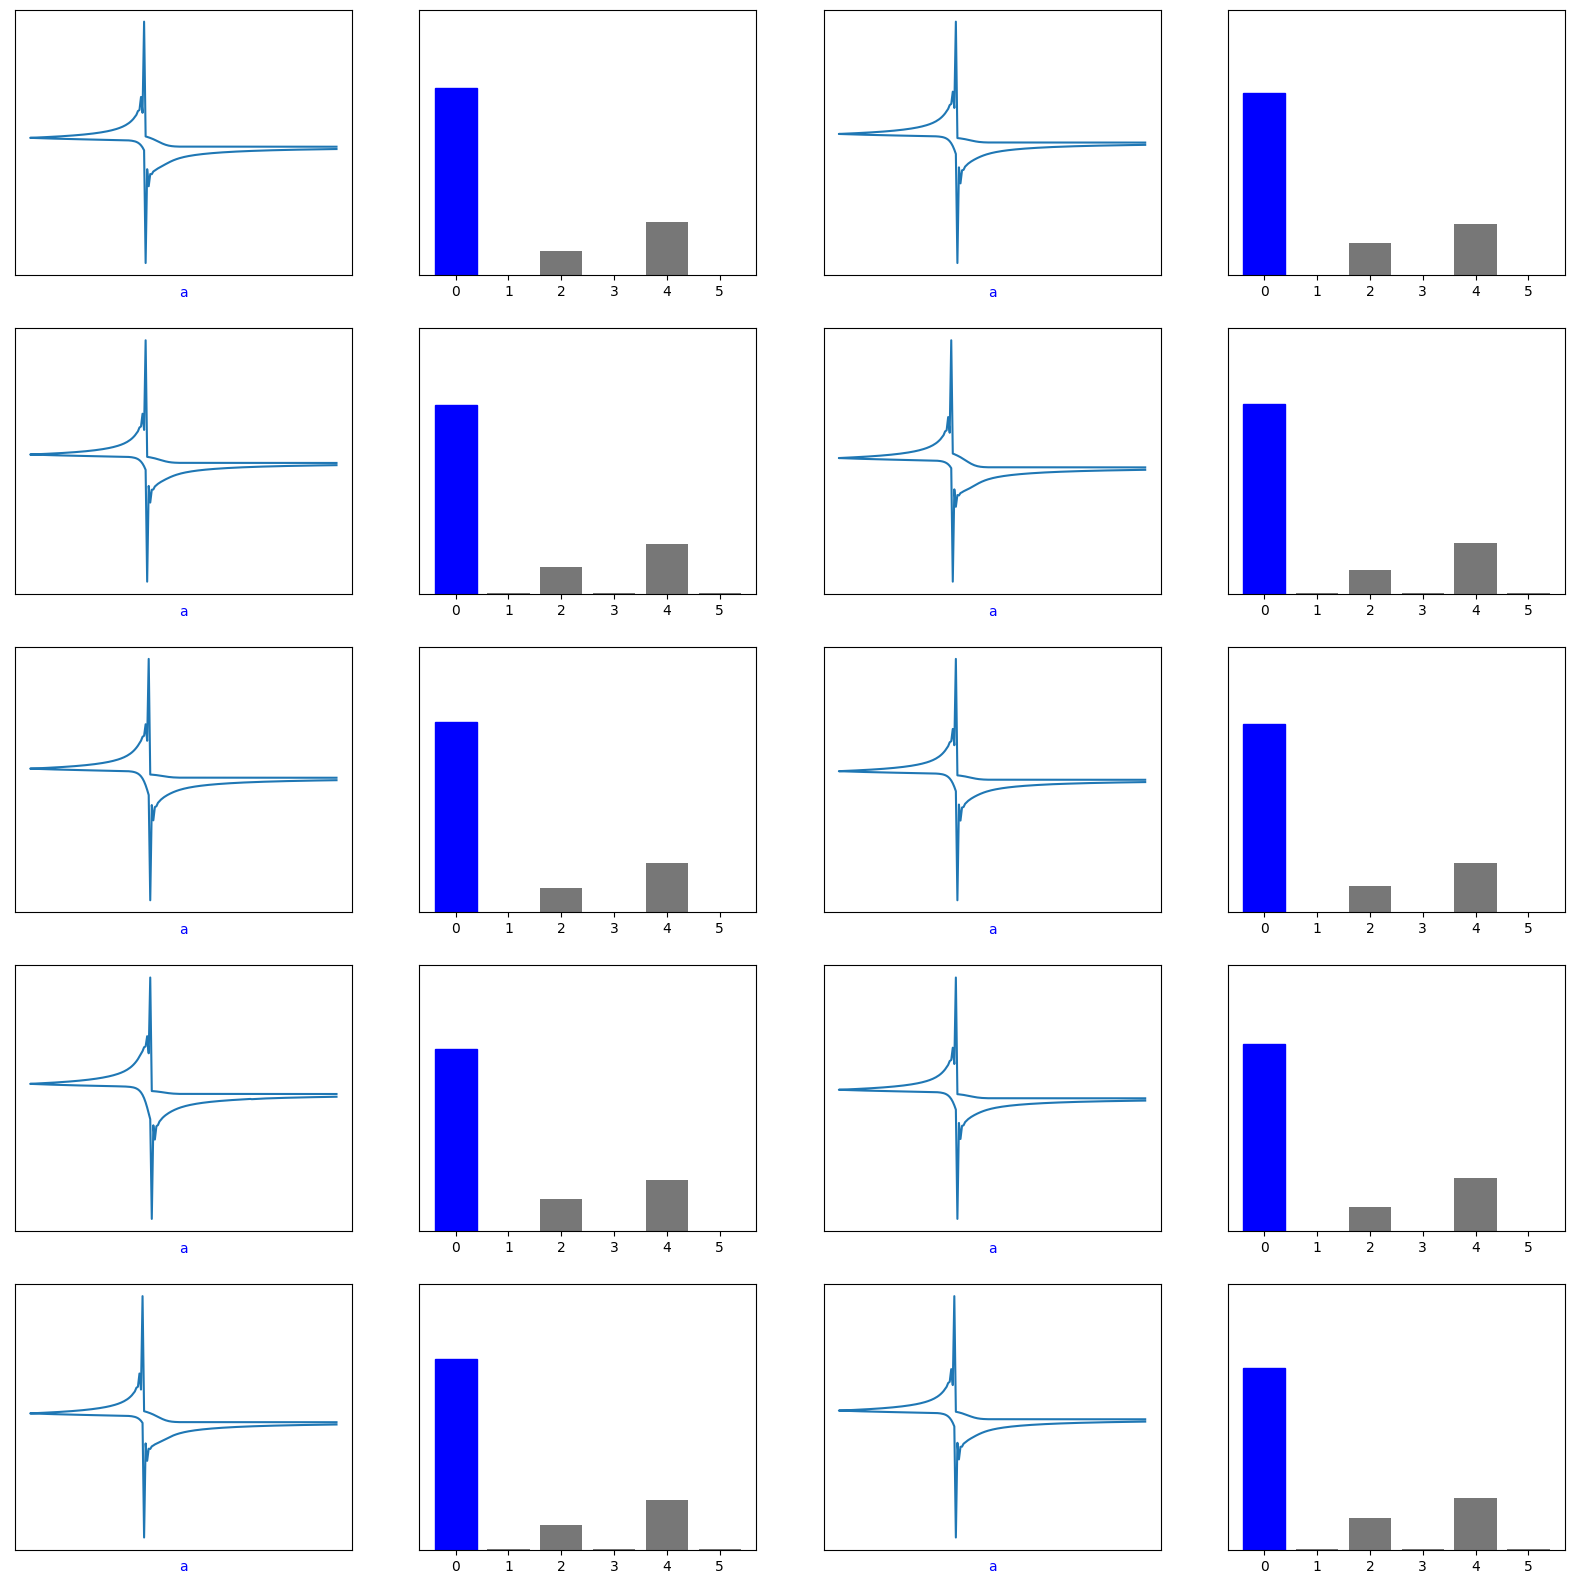

In [19]:
x = 100
# some visualization
plt.figure(figsize=(20,20))
for i in range(x,x+20):
    if i % 2 == 0: # plots graph on even subplots
        plt.subplot(5,4,i-x+1)
        plt.xticks([]) #gets rid of each individual x axis marker
        plt.yticks([])
        plt.grid(False)
        plot_image(i,predictions[i],test_label,test_data)
        plt.xlabel(class_names[test_label[i]])
    else: # plots bar chart on odd subplots 
        plt.subplot(5,4,i-x+1)
        plt.xticks([]) 
        plt.yticks([])
        plt.grid(False)
        plot_value_array(i,predictions[i],test_label)